In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit
from datetime import datetime

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
#f_carrier = 8431.0165302617e6 before GPSDO software change, average of Oct 11-17th.
#f_carrier = 8431.01653051e6
f_carrier = 8431016530.542998 # Carrier guess after taking mean of October 18-28th before TCM-3.
#f_carrier = 8431016531.832931
#f_carrier = 8431016531.832977 #Post TCM3 guess with very low mean.

In [3]:
data = np.fromfile('all.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3_analysis_a.gmd' #uses state vector from 2020-10-11T04:54:58.64
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

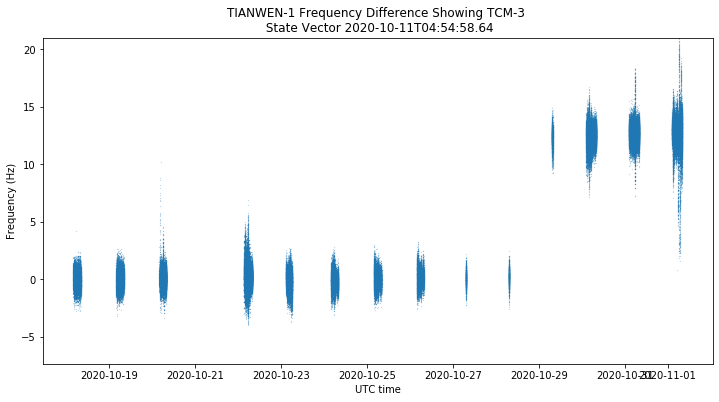

In [4]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.plot(t_data.datetime, freq_data - freq_gmat,'.', markersize=.2, label = 'strf file')
plt.title('TIANWEN-1 Frequency Difference Showing TCM-3 \n State Vector 2020-10-11T04:54:58.64')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show()

In [5]:
data = np.fromfile('18_28.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3_analysis_a.gmd' #uses state vector from 2020-10-11T04:54:58.64
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

/home/scott/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


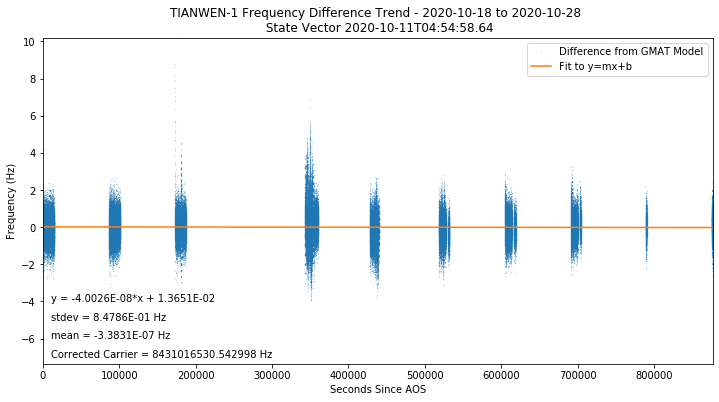

In [6]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.2, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(10000,np.mean(np_diff)-4, 'y = %.4E*x + %.4E'%(m,b))
plt.text(10000,np.mean(np_diff)-5, 'stdev = %.4E Hz'%np.std(np_diff))
plt.text(10000,np.mean(np_diff)-6, 'mean = %.4E Hz'%np.mean(np_diff))
plt.text(10000,np.mean(np_diff)-7, 'Corrected Carrier = %.6f Hz'%corrected_carrier)
plt.title('TIANWEN-1 Frequency Difference Trend - %s to %s \n State Vector 2020-10-11T04:54:58.64'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.show();


In [7]:
data = np.fromfile('29_1.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3_analysis_a.gmd' #uses state vector from 2020-10-11T04:54:58.64
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

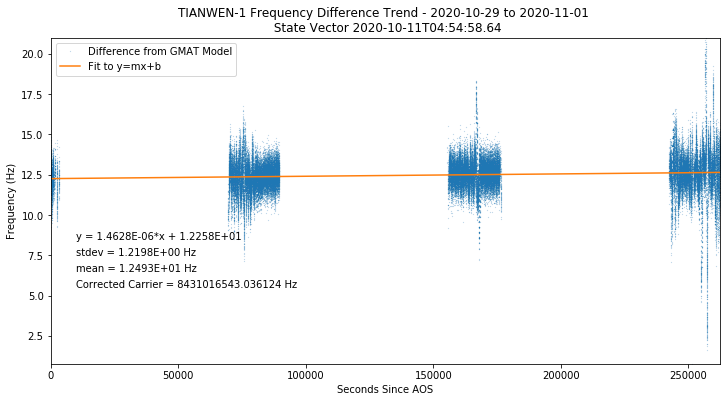

In [8]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.2, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(10000,np.mean(np_diff)-4, 'y = %.4E*x + %.4E'%(m,b))
plt.text(10000,np.mean(np_diff)-5, 'stdev = %.4E Hz'%np.std(np_diff))
plt.text(10000,np.mean(np_diff)-6, 'mean = %.4E Hz'%np.mean(np_diff))
plt.text(10000,np.mean(np_diff)-7, 'Corrected Carrier = %.6f Hz'%corrected_carrier)
plt.title('TIANWEN-1 Frequency Difference Trend - %s to %s \n State Vector 2020-10-11T04:54:58.64'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.show();


In [9]:
data = np.fromfile('29_1.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3.gmd' #uses state vector State Vector 2020-10-30T03:43:22.9642
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

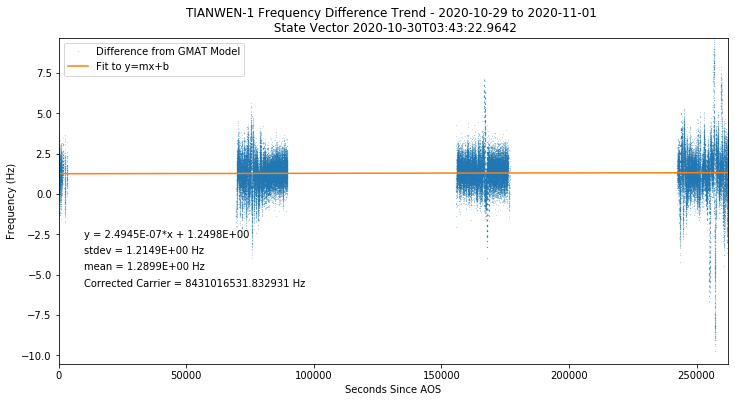

In [10]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.2, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(10000,np.mean(np_diff)-4, 'y = %.4E*x + %.4E'%(m,b))
plt.text(10000,np.mean(np_diff)-5, 'stdev = %.4E Hz'%np.std(np_diff))
plt.text(10000,np.mean(np_diff)-6, 'mean = %.4E Hz'%np.mean(np_diff))
plt.text(10000,np.mean(np_diff)-7, 'Corrected Carrier = %.6f Hz'%corrected_carrier)
plt.title('TIANWEN-1 Frequency Difference Trend - %s to %s \n State Vector 2020-10-30T03:43:22.9642'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.show();


In [11]:
data = np.fromfile('29_1.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_tcm3a.gmd' #uses state vector State Vector 2020-11-01 19:16:18.2247
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

x = 0
count = t_data.shape[0]
t_zero = (data[0,0] - int(data[0,0])) * 86400
np_t = [0.0] * count

for x in range (0,count):
    np_t[x] = ((data[x,0] - int(data[0,0])) * 86400) - t_zero

np_t = np.array(np_t)

m, b = np.polyfit(np_t, np_diff,1)
corrected_carrier = f_carrier + np.mean(np_diff)

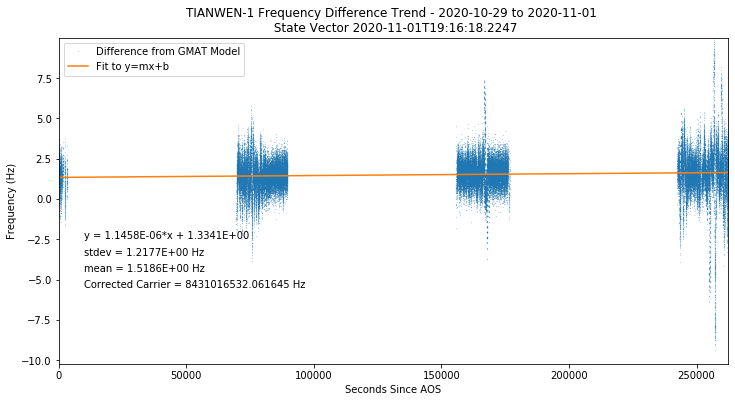

In [12]:
plt.ylim(np.min(np_diff), np.max(np_diff))
plt.xlim(0,max(np_t))
plt.plot(np_t, freq_diff, '.',markersize=.2, label = 'Difference from GMAT Model')
plt.plot(np_t, m*np_t + b, label = 'Fit to y=mx+b')
plt.text(10000,np.mean(np_diff)-4, 'y = %.4E*x + %.4E'%(m,b))
plt.text(10000,np.mean(np_diff)-5, 'stdev = %.4E Hz'%np.std(np_diff))
plt.text(10000,np.mean(np_diff)-6, 'mean = %.4E Hz'%np.mean(np_diff))
plt.text(10000,np.mean(np_diff)-7, 'Corrected Carrier = %.6f Hz'%corrected_carrier)
plt.title('TIANWEN-1 Frequency Difference Trend - %s to %s \n State Vector 2020-11-01T19:16:18.2247'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Seconds Since AOS')
plt.legend()
plt.show();
